# **Confidence Interval** 

A confidence interval (CI) is a range of values, derived from sample data, that is likely to contain the true population parameter

Most commonly used with either Mean or Proportion

We are X% confident that the true value lies within this range

9%% CI most common (Other Common Levels: 90% and 99%)

- Covers 95% of the means
- If we take 100 samples, about 95 intervals will contain the true parameter
- The interval doesn't gurantee that the paramter lies within it; it reflects the probability of the method.

CI = Sample mean +- STD error or Sample Mean * T Distribution 9% Central Region

Confidence and probability are often used in casual conversation as if they mean the same thing, but in statistics, that have distinct meanings

When we say "We are 9%% confident that the true paramter lies within the interval," it does not mean there is a 95% probability that the specific interval (calculated from out data) contains the true parameter. Instead, it refers to the reliability of the method use to construct the interval

A 95% confidence interval means that if we repeated the experiment or sampling process many, times, 95%  of the intervals generated from those samples would contain the true population parameter.

For a single interval, the paprameter is either inside or outside - there is no probability involved at that point. The true value is fixed and the interval is fixed once calculated

Random sample of 25 marathoners Long Run for Race Build up

Sample mean is 20 Miles, Standard Deviation 4 Miles

- Step 1: Standard error 4/ (25) ^ (1/2) = 0.8
- Step 2: Z Value 95 CI = 1.96
- Step 3: Margin of Error = 1.96 * 0.8 = 1.568
- Step 4: 20 +- 1.568

The 95% confidence interval for the average marathon long run is (18.43 miles, 21.57 miles)

This means we are 95% confident that the true average distance of marathon long runs is between 18.43 and 21.57 miles

### Influencing the Width

Sample Size (n): Larger Smaples = Narrower Intervals

Variability ():: Higher Variability = wider intervals

Confident Level: Higher confidence (e.g 99%) = wider intervals

### Multiple Confidence Intervals

A common rule of thumb is that if two confidence intervals do not overlap, it suggests that there is a statistically significant differnce between two groups or datasets.

Non-overlapping CIs Indicate that the estimated ranges of plausible values for the two population paramters do not share any comon values 

Example Running 5k Longest Run CI 2-6 Miles | 50k Longest run CI 20-30 Miles

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

np.random.seed(20)

### Example #1 Marathon long Run

In [2]:
data = np.random.normal(loc=20, scale=4, size=25)
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
n = len(data)

standard_error = std_dev / np.sqrt(n)
confidence_intervals = [0.9, 0.95, 0.99]

for conf in confidence_intervals:
    z = stats.norm.pdf(1 - (1 - conf) / 2)
    margin_of_error_cof = z * standard_error
    ci_lower = mean - margin_of_error_cof
    ci_upper = mean + margin_of_error_cof

    print(f'{int(conf * 100)}% Confidence Interval ({ci_lower:.2f} , {ci_upper:.2f})')

90% Confidence Interval (19.52 , 19.98)
95% Confidence Interval (19.53 , 19.97)
99% Confidence Interval (19.53 , 19.97)


### Example #2 Influence Width

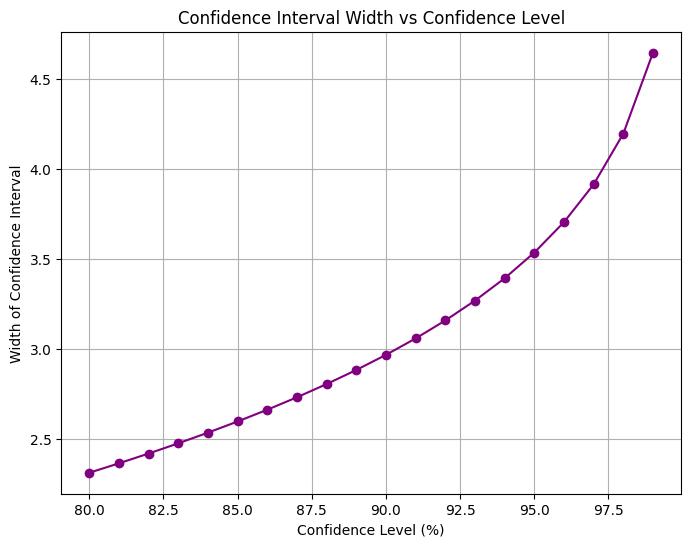

In [10]:
confidence_levels = np.linspace(0.8, 0.99, 20)
ci_widths = []

for conf_level in confidence_levels:
     z = stats.norm.ppf(1 - (1 - conf_level) / 2)
     margin_of_error = z * standard_error
     ci_width = 2 * margin_of_error
     ci_widths.append(ci_width)

plt.figure(figsize=(8,6))
plt.plot(confidence_levels * 100, ci_widths, marker='o', color="purple")
plt.title("Confidence Interval Width vs Confidence Level")
plt.xlabel("Confidence Level (%)")
plt.ylabel('Width of Confidence Interval')
plt.grid(True)
plt.show()

### Example #3 Forrest Plot with Multiple CI - Different Types of Marathon Runners

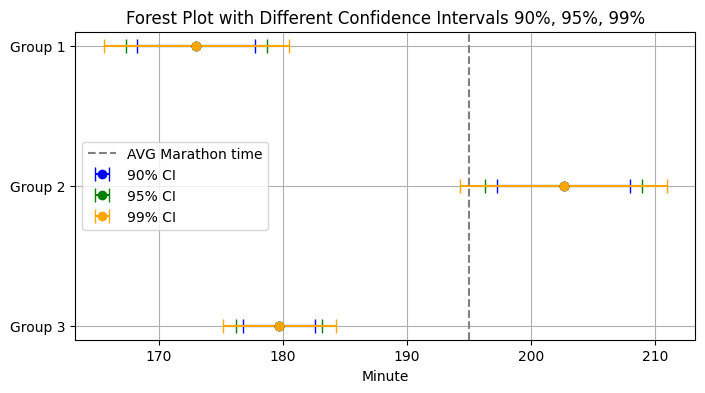

In [11]:
colors = ['blue','green', 'orange']
conf_levels = [0.9, 0.95, 0.99]

data_marathon_group_1 = np.random.normal(loc=175, scale=15, size=25)
data_marathon_group_2 = np.random.normal(loc=205, scale=20, size=25)
data_marathon_group_3 = np.random.normal(loc=180, scale=10, size=25)

groups = ['Group 1', 'Group 2', 'Group 3']
data_sets = [data_marathon_group_1, data_marathon_group_2, data_marathon_group_3]
means = [np.mean(data) for data in data_sets]
ses = [np.std(data, ddof=1) / np.sqrt(len(data)) for data in data_sets]

plt.figure(figsize=(8,4))

for i, conf in enumerate(conf_levels):
    z = stats.norm.ppf(1 - (1 - conf) / 2)
    ci_intervals = [(m - z * se, m+  z * se) for m, se in zip(means, ses)]
    lower_errors = [m - ci[0] for m, ci in zip(means,ci_intervals)]
    upper_errors = [ci[1] - m for m, ci in zip(means,ci_intervals)]

    plt.errorbar(x=means, y=groups, xerr=[lower_errors, upper_errors], fmt="o", capsize=5, color=colors[i], label=f'{int(conf*100)}% CI')

plt.axvline(x=195, linestyle="--", color="gray", label="AVG Marathon time")
plt.title("Forest Plot with Different Confidence Intervals 90%, 95%, 99%")
plt.xlabel("Minute")
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Example #4 Bar Chart

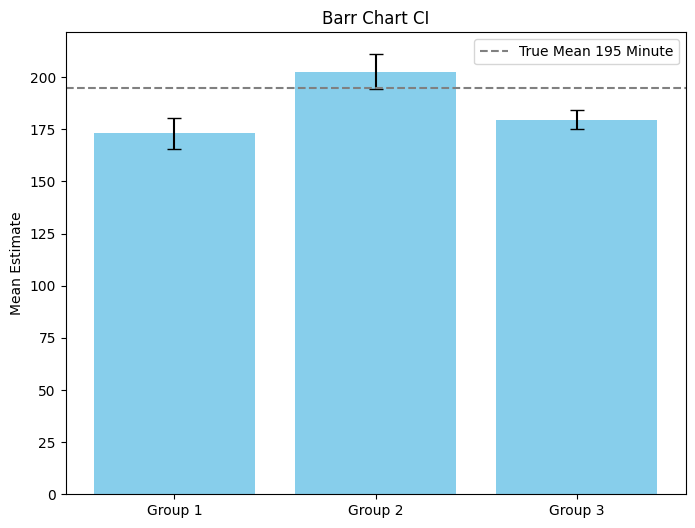

In [12]:
plt.figure(figsize=(8,6))

symmetric_errors = [(low + up) / 2 for low, up in zip(lower_errors, upper_errors)]

plt.bar(groups, means, yerr=symmetric_errors, capsize=5, color='skyblue')
plt.axhline(y=195, linestyle="--", color="gray", label="True Mean 195 Minute")
plt.title("Barr Chart CI")
plt.ylabel("Mean Estimate")
plt.legend()
plt.show()